## 5.10 Support Vector Machine
Główna idea SVM opiera się na podziale zbioru hiperpłaszczyzną. Hiperpłaszczyzną nazywamy przestrzeń o wymiar niższą niż ta, w której zakodowane są nasze wektory cech, Jeśli więc mamy wektory o długości *N*, to hiperpłaszczyzna będzie wyznaczona przez N parametrów oraz wyraz wolny.

W dwóch wymiarach jesteśmy w stanie odseparować dwie grupy przykładów za pomocą prostej, o ile są liniowo separowalne. W trzech wymiarach za pomocą płaszczyzny, a w wyższych wymiarach nazywamy ją hiperpłaszczyzną. Dla problemu liniowo separowalnego, istnieje nieskończenie wiele takich hiperpłaszczyzn. SVM dobiera taką, aby odseparować obiektu obu klas z jak anjwiększym marginesem. Największy margines to taki, który jest po obu stronach możliwie najdalej od obiektów klas, jeśli rozważamy klasyfikację binarną.

Nie zawsze jednak dane są liniowo separowalne. W takim wypadku, SVM stara się dopasować hiperpłaszczyznę w taki sposób aby liczba punktów pozostających po niepoprawnej stronie prostej, była jak najniższa. Nazwa wektory wspierające odnosi się do punktów danych, które są najbliżej stworzonej hiperpłaszczyzny i są punktami odniesienia.

### SVM w 2D

In [1]:
import pandas as pd
import numpy as np

<Axes: xlabel='x', ylabel='y'>

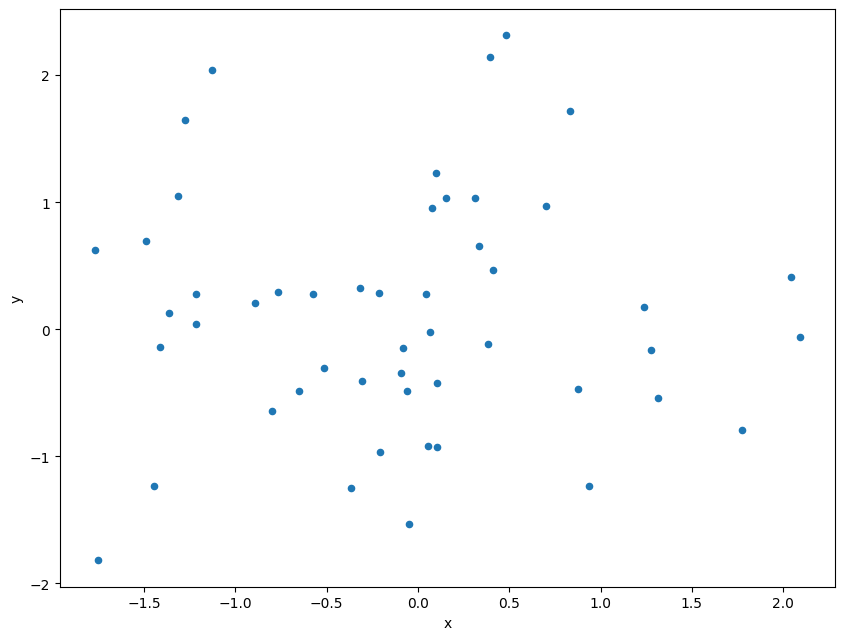

In [2]:
np.random.seed(2020)
one_df = pd.DataFrame({
    "x": np.random.normal(size=50),
    "y": np.random.normal(size=50),
})
one_df.plot.scatter(x="x", y="y", figsize=(10, 7.5))

<Axes: xlabel='x', ylabel='y'>

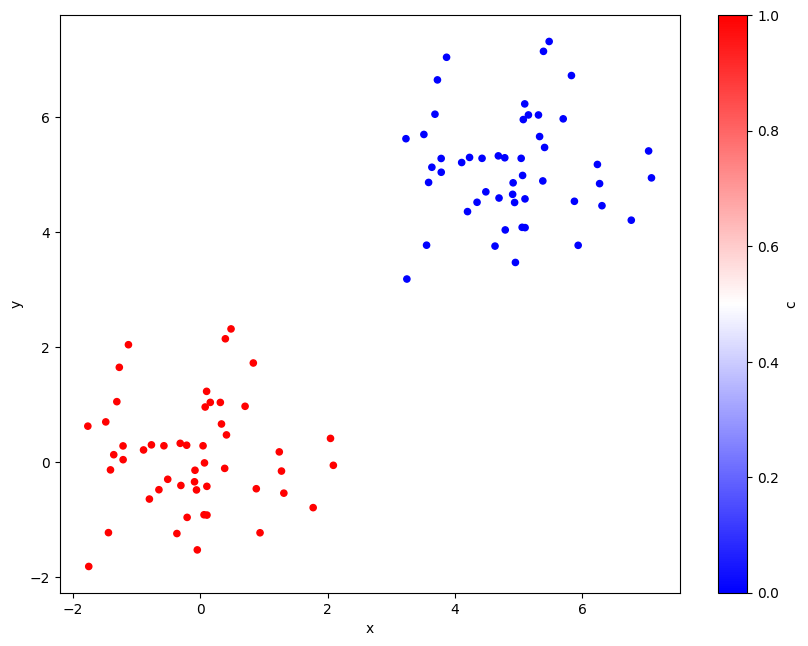

In [3]:
blobs_df = pd.concat([
    one_df.assign(c=1),
    (one_df + 5).assign(c=0),
])
blobs_df.plot.scatter(x="x", y="y", c="c", cmap="bwr", figsize=(10, 7.5))

Na pierwszy rzut oka widać, że stworzony problem jest liniowo separowalny. W związku z tym, SVM powinien poradzić sobie idealnie z klasyfikacją odpowiednich punktów.

### Nauczenie modelu SVM

In [4]:
from sklearn.svm import LinearSVC

In [5]:
svm = LinearSVC()
svm.fit(blobs_df.drop(columns="c"), blobs_df["c"])

LinearSVC()

In [6]:
x_test = np.linspace(-2, 8, 1000)
y_test = np.linspace(-2, 8, 1000)

In [7]:
import matplotlib.pyplot as plt

In [8]:
xx, yy = np.meshgrid(x_test, y_test)
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

/home/maciej/deep/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


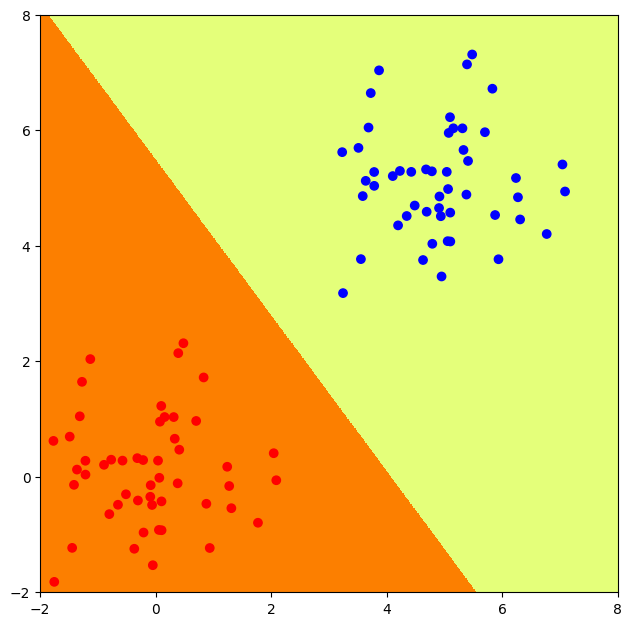

In [10]:
plt.figure(figsize=(10, 7.5))
plt.imshow(Z, interpolation="nearest", extent=(-2, 8, -2, 8), cmap="Wistia", origin="lower")
plt.scatter(blobs_df["x"], blobs_df["y"], c=blobs_df["c"], cmap="bwr")

<Axes: xlabel='x', ylabel='y'>

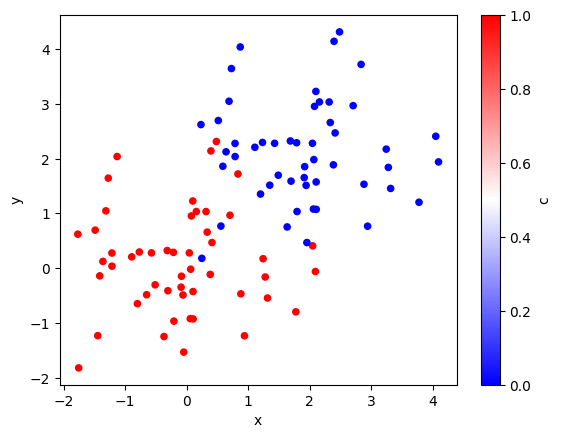

In [11]:
blobs_df = pd.concat([
    one_df.assign(c=1),
    (one_df + 2).assign(c=0)
])

blobs_df.plot.scatter(x="x", y="y", c="c", cmap="bwr")

/home/maciej/deep/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


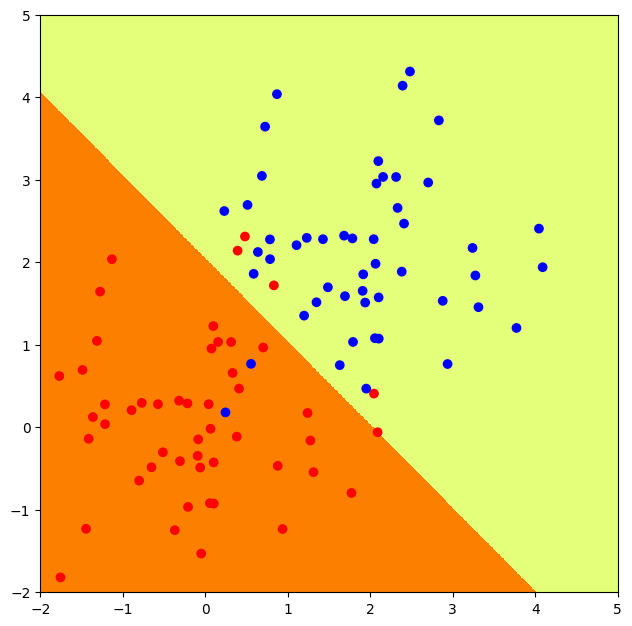

In [14]:
svm = LinearSVC()
svm.fit(blobs_df.drop(columns="c"), blobs_df["c"])
x_test = np.linspace(-2, 5, 1000)
y_test = np.linspace(-2, 5, 1000)
import matplotlib.pyplot as plt

xx, yy = np.meshgrid(x_test, y_test)
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.figure(figsize=(10, 7.5))
plt.imshow(Z, interpolation="nearest", extent=(-2, 5, -2, 5), cmap="Wistia", origin="lower")
plt.scatter(blobs_df["x"], blobs_df["y"], c=blobs_df["c"], cmap="bwr")

## Rozszerzenia SVM
Oryginalnie, algorytm SVM tworzy klasyfikator liniowy, jednak istnieją również rozszerzenia, które wykorzystują tzw. kernel trick i niejawnie przechodzą przy tym do innych przestrzeni, w których problem nieseparowalny liniowo staje się już separowalny.

In [15]:
from sklearn.svm import SVC

/home/maciej/deep/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


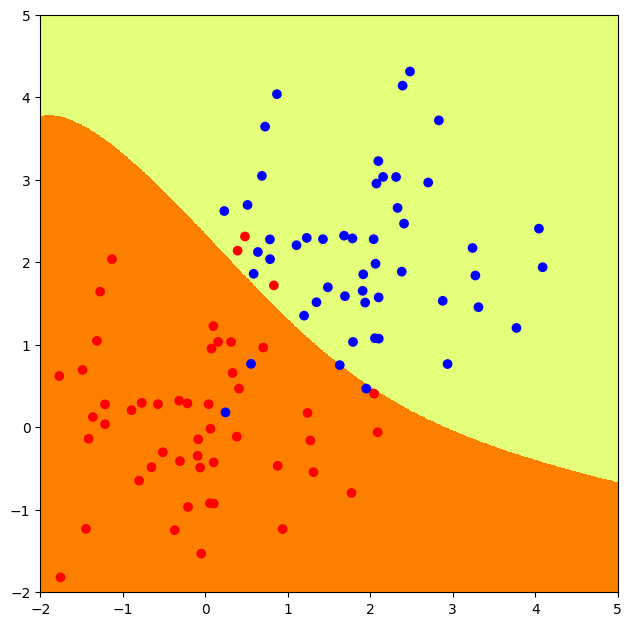

In [17]:
svm = SVC(kernel="poly")
svm.fit(blobs_df.drop(columns="c"), blobs_df["c"])

x_test = np.linspace(-2, 5, 1000)
y_test = np.linspace(-2, 5, 1000)
import matplotlib.pyplot as plt

xx, yy = np.meshgrid(x_test, y_test)
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.figure(figsize=(10, 7.5))
plt.imshow(Z, interpolation="nearest", extent=(-2, 5, -2, 5), cmap="Wistia", origin="lower")
plt.scatter(blobs_df["x"], blobs_df["y"], c=blobs_df["c"], cmap="bwr")